<a href="https://colab.research.google.com/github/acedesci/scanalytics/blob/master/S04_Data_Structures_2/S4_InClass_Exercises_Data_Structures_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S4 - In-class Exercises: Python Data Structures II and SCM examples (Solution)

---
## Instructions:
Most of the exercises presented here allows you to practice basic Python programming for some applications in Operations Management and Logistics.

For each exercise, you have a code cell for the response underneath it, where you should write your answer between the lines containing `### start your code here ###` and `### end your code here ###`. Your code can contain one or more lines and you can execute this cell in order to complete the exercise. To execute the cell, you can type `Shift+Enter` or press the play button in the toolbar above. Your results will appear right below this response cell.

NOTE: Please pay attention to the variable name of the output you would need to provide under each question. You must use the same variable name for the output so that the result can be printed out correctly.

---
## Computing total costs and analyzing different inventory policies
In this exercise, you will use pandas library to compare two different inventory policies, compute the their corresponding total costs and selecting the most economical policy.


### Prerequisite: Reading data
Import the pandas library under the alias `pd`. Import the csv file `InvPolicies.csv` into a `DataFrame`, and select the first column named `'Period'` as the index of the `DataFrame`. Then display the first 10 rows of your `DataFrame`.

**Hint:** you can define the index column of the `DataFrame` using the `index_col` parameter of the `.read_csv()` function. Check [this page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) for more information.

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/acedesci/scanalytics/master/S04_Data_Structures_2/InvPolicy.csv'
df_inv = pd.read_csv(url, index_col='Week')
df_inv.head(10)

,P1_Ending_Inv,P1_Order,P2_Ending_Inv,P2_Order
Week,,,,
1,29,51,29,41
2,13,0,13,0
3,0,0,0,29
4,34,0,24,0
5,23,57,13,28
6,0,0,19,0
7,-17,0,2,40
8,20,60,10,0
9,4,0,-6,36


You can see that, similar to the exercise in class, the imported data present a demand scenario for the next 52 weeks, and the following data for two different inventory policies: the inventory level at the beginning of each period, the amount received at the beginning of each period, the inventory level at the end of each period and the ordered quantity at each period. 

---
### Exercise 1: Descriptive analysis
Let's analyse a bit our data. As an exploratory analysis, for each of the two inventory policies `P1` and `P2`, please compute the following values and print the results. If the number is fractional, please print it in two-digit format.

* *Average physical inventory*. This is an average ending inventory but consider the minimum inventory is at zero. The inventory when a backlog occurs which is represented by a negative inventory is considered zero.
* *Number of periods with shortage/backlog*
* *Number of orders under each policy*
* *Average order quantity under each policy* when an order is placed

**Hint:** If you want to set a lower/upper bound for the values in a column or DataFrame. You can consider using `df.clip(...)` function to assign a minimum or maximum value to the column. See [link](https://www.w3resource.com/pandas/dataframe/dataframe-clip.php)

In [23]:
### start your code here ###
print('Average physical inventory under P1:', '{:.2f}'.format(df_inv['P1_Ending_Inv'].clip(lower=0).mean()))
print('Average physical inventory under P2:', '{:.2f}'.format(df_inv['P2_Ending_Inv'].clip(lower=0).mean()))

print('N.Periods with shortage under P1:', sum(df_inv['P1_Ending_Inv'] < 0))
print('N.Periods with shortage under P2:', sum(df_inv['P2_Ending_Inv'] < 0))

print('Number of orders under P1:', sum(df_inv['P1_Order'] > 0))
print('Number of orders under P2:', sum(df_inv['P2_Order'] > 0))

print('Average order quantity under P1:', '{:.2f}'.format(df_inv['P1_Order'].loc[df_inv['P1_Order'] > 0].mean()))
print('Average order quantity under P2:', '{:.2f}'.format(df_inv['P2_Order'].loc[df_inv['P2_Order'] > 0].mean()))
### start your code here ###


Average physical inventory under P1: 12.60
Average physical inventory under P2: 11.96
N.Periods with shortage under P1: 14
N.Periods with shortage under P2: 7
Number of orders under P1: 16
Number of orders under P2: 27
Average order quantity under P1: 60.19
Average order quantity under P2: 36.63


,P1_Ending_Inv,P1_Order,P2_Ending_Inv,P2_Order
count,52.000000,52.000000,52.000000,52.000000
mean,9.153846,18.519231,11.192308,19.019231
std,17.254024,28.290850,10.678985,19.792542
min,-26.000000,0.000000,-11.000000,0.000000
25%,-3.500000,0.000000,2.750000,0.000000
50%,10.000000,0.000000,12.500000,27.500000
75%,23.500000,53.500000,20.250000,35.250000
max,38.000000,77.000000,35.000000,77.000000


---
### Exercise 2: Visualizing inventory levels
Create graphs to visualize the ending inventory levels (columns `['P1_Ending_Inv', 'P2_Ending_Inv']` of the first 36 weeks under each policy using (i) a bar plot with the size `figsize = (12,4)`, (ii) a box plot (`kind = 'box'`), and (iii) Probability density plot (`kind = 'density'`). See [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

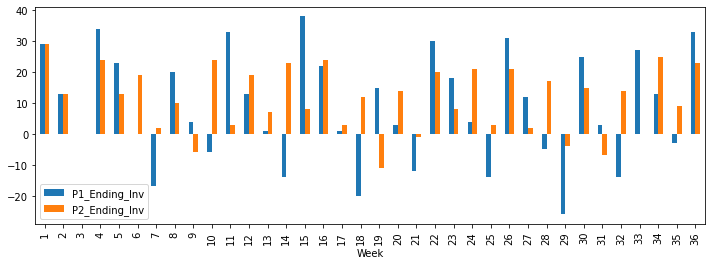

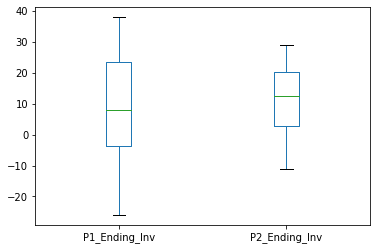

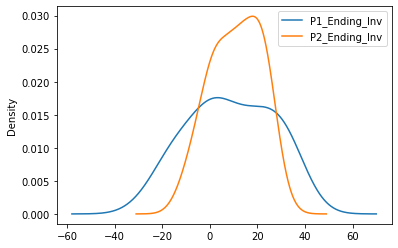

In [47]:
### start your code here ###
df_inv[:36][['P1_Ending_Inv', 'P2_Ending_Inv']].plot(kind = 'bar',figsize=(12,4))   # plotting inv levels
df_inv[:36][['P1_Ending_Inv', 'P2_Ending_Inv']].plot(kind = 'box')   # plotting inv levels
df_inv[:36][['P1_Ending_Inv', 'P2_Ending_Inv']].plot(kind = 'density')   # plotting inv levels
### end your code here ###

---
### Exercise 4: Computing inventory management cost for each period
In this exercise you will compute the inventory management cost for each inventory policy at each period. The inventory management cost is computed as the sum of the holding cost, shortage cost and ordering cost. The following costs parameters are given:

*   `holding_cost`: unit inventory holding cost (\$ per unit per period)
*   `shortage_cost`: unit shortage cost (\$ per unit of shortage)
*   `ordering_cost`: ordering cost (\$ per order - regardless of the number of units ordered in a order)


Please compute the inventory management cost for each period under each policy `P1` and `P2`. Add this new information as new columns of the `DataFrame` named as `P1_Cost` and `P2_Cost`.


In [39]:
holding_cost = 5
shortage_cost = 15
ordering_cost = 150

In [45]:
### start your code here ###

def inventory_cost(end_inv, order_qty, holding_cost, shortage_cost, ordering_cost):
  if order_qty > 0:
    return ordering_cost + max(end_inv, 0)*holding_cost + min(end_inv,0)*shortage_cost*(-1)
  else:
    return max(end_inv, 0)*holding_cost + min(end_inv,0)*shortage_cost*(-1)
  
df_inv['P1_TotalCost'] = [inventory_cost(df_inv.at[t, 'P1_Ending_Inv'], df_inv.at[t, 'P1_Order'], \
                                         holding_cost, shortage_cost, ordering_cost) for t in df_inv.index]

df_inv['P2_TotalCost'] = [inventory_cost(df_inv.at[t, 'P2_Ending_Inv'], df_inv.at[t, 'P2_Order'], \
                                         holding_cost, shortage_cost, ordering_cost) for t in df_inv.index]

### end your code here ###

print("Total IM cost for P1:$", df_inv['P1_TotalCost'].sum(),", Total IM cost for P2:$", df_inv['P2_TotalCost'].sum())
df_inv.tail(10)

Total IM cost for P1:$ 8360 , Total IM cost for P2:$ 7760


,P1_Ending_Inv,P1_Order,P2_Ending_Inv,P2_Order,P1_TotalCost,P2_TotalCost
Week,,,,,,
43,-8,0,19,0,120,95
44,38,0,4,31,190,170
45,20,60,21,0,250,105
46,6,0,7,32,30,185
47,-13,0,19,0,195,95
48,28,52,0,38,290,150
49,12,0,16,0,60,80
50,-8,0,-4,36,120,210
51,25,55,15,55,275,225
